In [ ]:
DSBDA PRACTICAL 5

1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given datast

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


1) Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset

In [54]:
data = pd.read_csv("Social_Network_Ads.csv")

In [55]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
data.shape

(400, 5)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [58]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [59]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

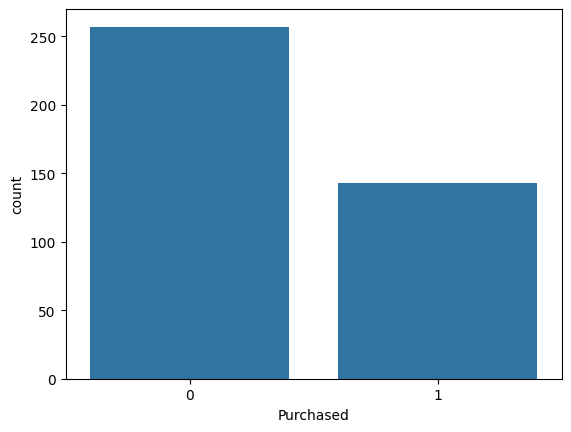

In [60]:
# Target label : 'Purchased'
sns.countplot(data = data, x = 'Purchased');

<Axes: >

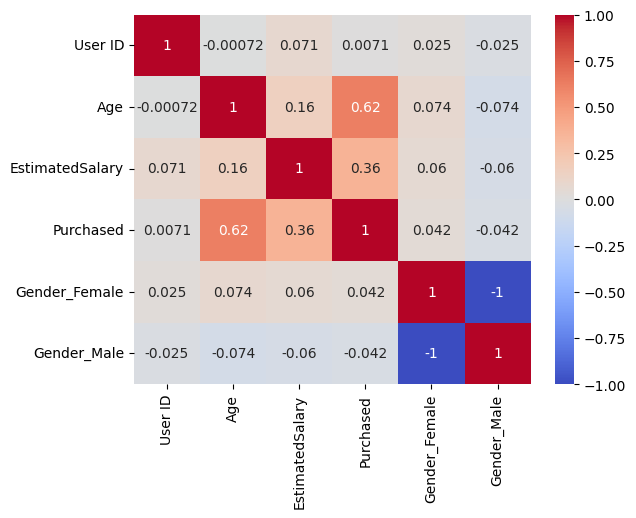

In [61]:
# Assuming 'Gender' is the non-numeric column
data_encoded = pd.get_dummies(data, columns=['Gender'])  # One-hot encode 'Gender' column
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')

In [62]:
x = data[['Age', 'EstimatedSalary']]

y = data['Purchased']

In [63]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [64]:
x = features
y = label

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

MODEL

In [66]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

PREDICTION

In [67]:
y_pred = model.predict(x_test)

In [68]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

EVALUATION

<Axes: >

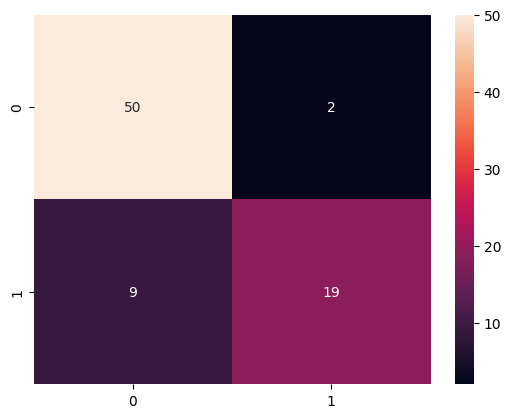

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)





In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

